ANALISIS ESTADISTICO DE DATASET:ECOMMERCE CHURN

Fuente: Kaggle

Autor: Mario Paucar 

In [145]:
#Paso1: Importamos librerias
#!pip install pyjanitor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import janitor
import missingno

#Paso2: Ejecutamos pandas Missing extensión notebook
%run "D:\\Conocimiento Adquiridos\Data Science _ Codigo Bootcamp\Desarrollo_MP\BDS-G3\Dia_7\pandas_missing_extension.ipynb"

#Paso3: Cargamos dataset
data_df = pd.read_csv("D:\\Conocimiento Adquiridos\Data Science _ Codigo Bootcamp\Codigo - Github\BDS-G3\dia7\ecom_data.csv")
display(data_df.head(2))

#Paso4: EDA
display(data_df.dtypes)
display(data_df.dtypes.value_counts())
display(data_df.shape)
data_df.drop('CustomerID',axis=1,inplace=True) #eliminar CustomerID
display(data_df.head(5))

<>:14: DeprecationWarning: invalid escape sequence '\D'
<>:14: DeprecationWarning: invalid escape sequence '\D'
C:\Users\ingma\AppData\Local\Temp\ipykernel_3348\3252269982.py:14: DeprecationWarning: invalid escape sequence '\D'
  data_df = pd.read_csv("D:\\Conocimiento Adquiridos\Data Science _ Codigo Bootcamp\Codigo - Github\BDS-G3\dia7\ecom_data.csv")


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121


CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

int64      8
float64    7
object     5
dtype: int64

(5630, 20)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


número de datos faltantes


1856

None

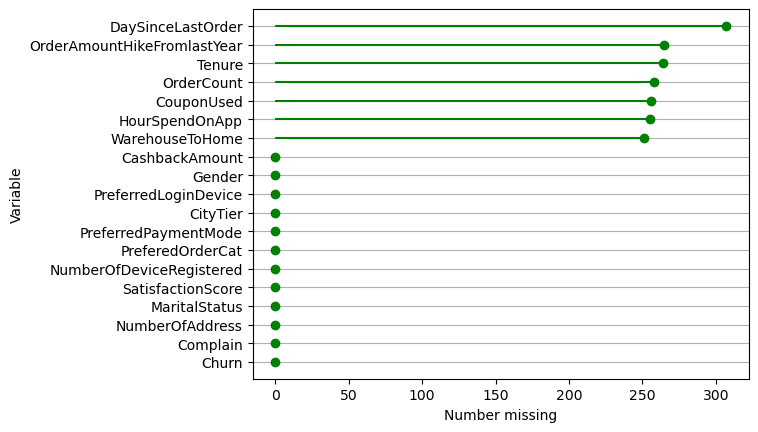

In [27]:
#Paso5:Tratamiento de datos faltantes
print("número de datos faltantes")
display(data_df.missing.number_missing())
display(data_df.missing.missing_variable_plot())

<Axes: >

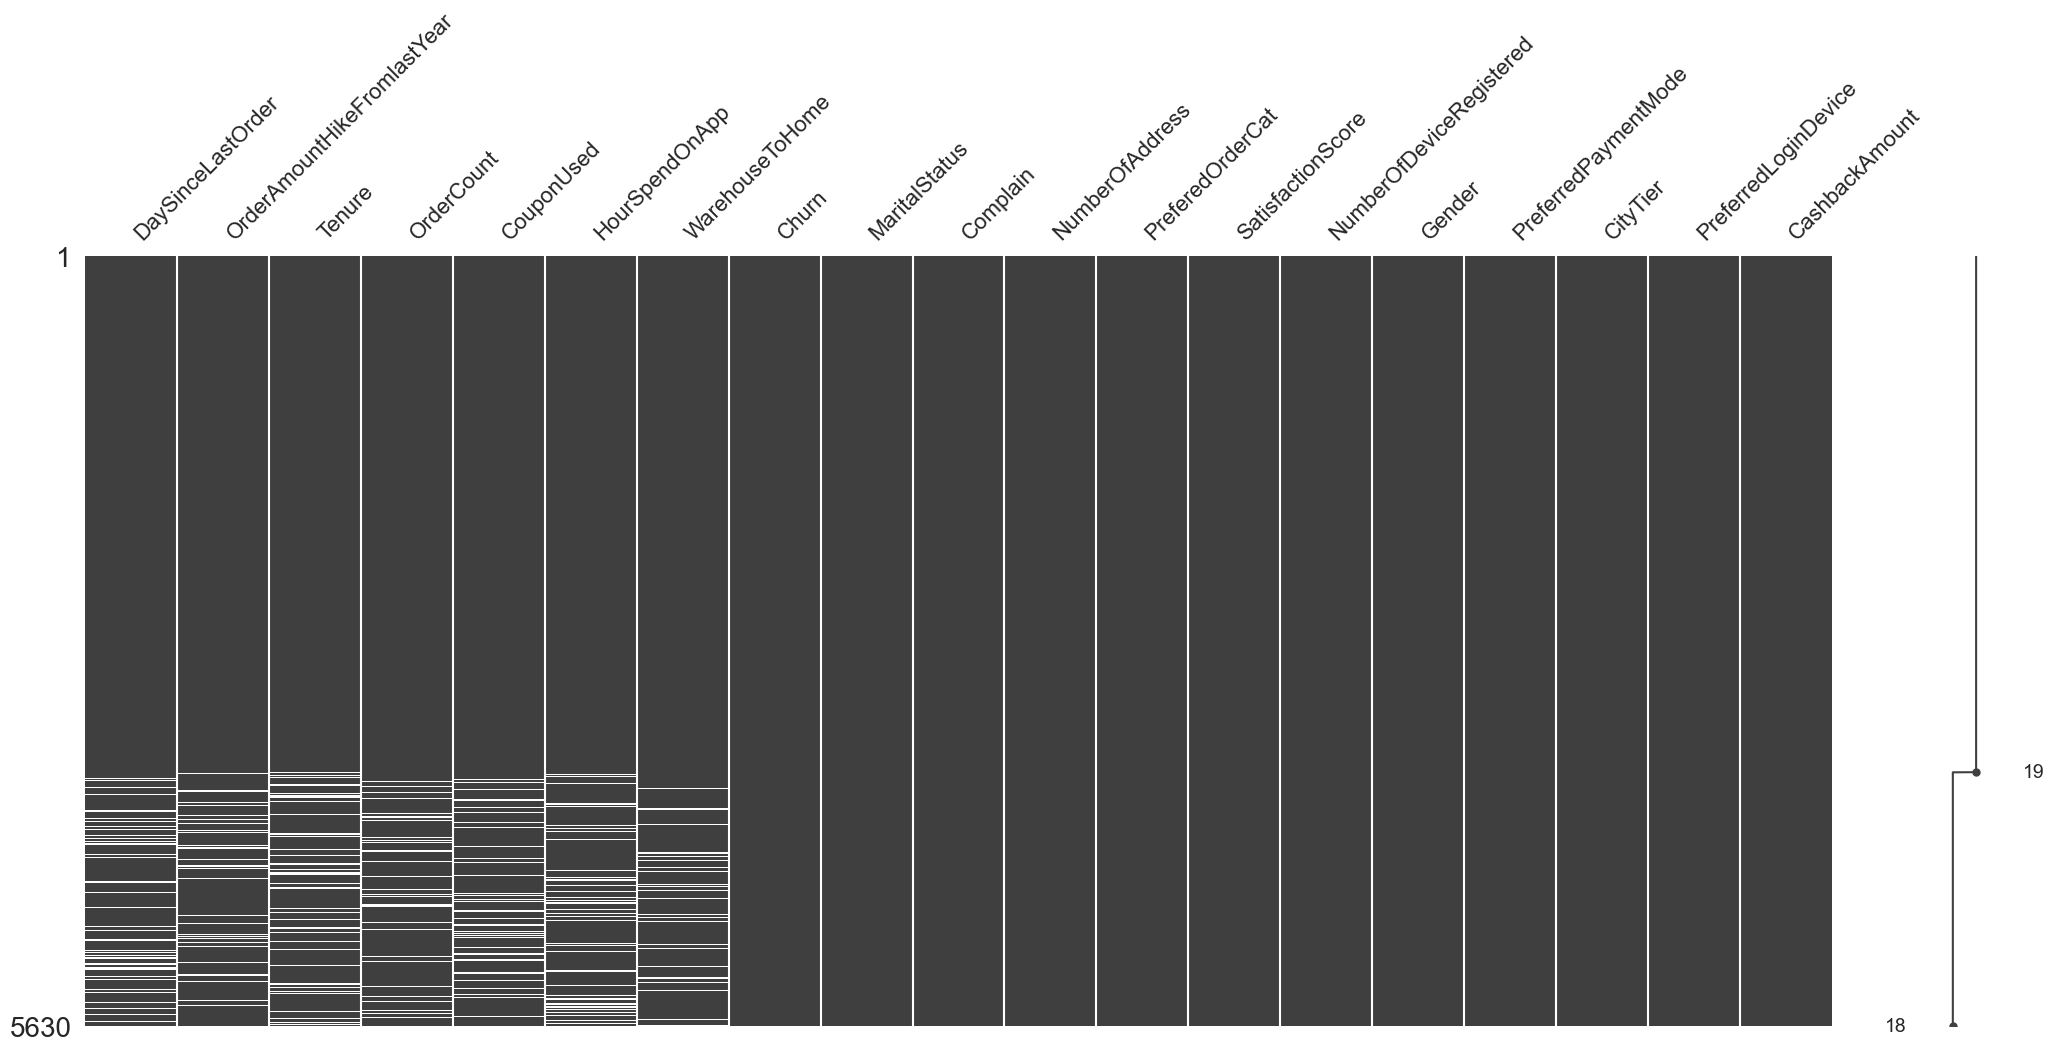

In [144]:
(
    data_df.missing.sort_variables_by_missingness()
    .pipe(
        missingno.matrix,sort='descending'
    )
)


In [143]:
#Cambiamos la nomenclatura de columnas
data_df_raw = (
    data_df.clean_names(
        case_type="snake"
    )
)
display(data_df_raw.head(5))
display(data_df_raw.info())

,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,prefered_order_cat,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   churn                            5630 non-null   int64  
 1   tenure                           5366 non-null   float64
 2   preferred_login_device           5630 non-null   object 
 3   city_tier                        5630 non-null   int64  
 4   warehouse_to_home                5379 non-null   float64
 5   preferred_payment_mode           5630 non-null   object 
 6   gender                           5630 non-null   object 
 7   hour_spend_on_app                5375 non-null   float64
 8   number_of_device_registered      5630 non-null   int64  
 9   prefered_order_cat               5630 non-null   object 
 10  satisfaction_score               5630 non-null   int64  
 11  marital_status                   5630 non-null   object 
 12  number_of_address   

None

## Imputación de nulos por cada variable

,Descripción,Valor
0,Media Original,4.543491
1,Media sin Nulos_mean,4.543491
2,Media sin Nulos_median,4.459325
3,Media sin Nulos_moda,4.543491


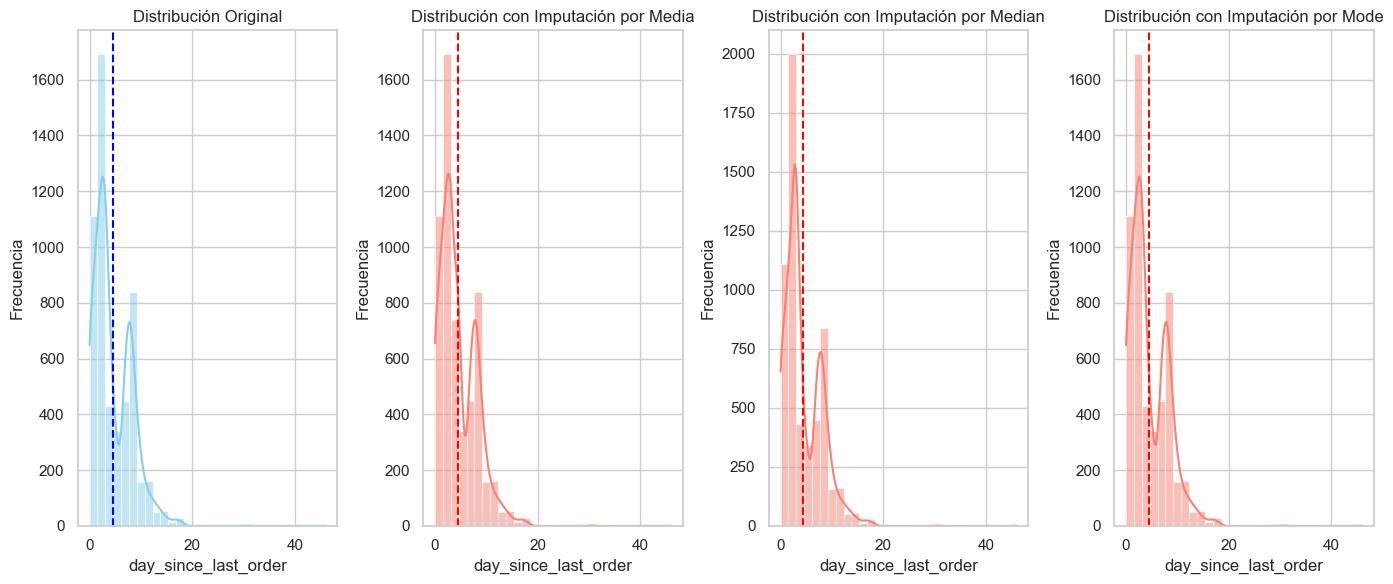

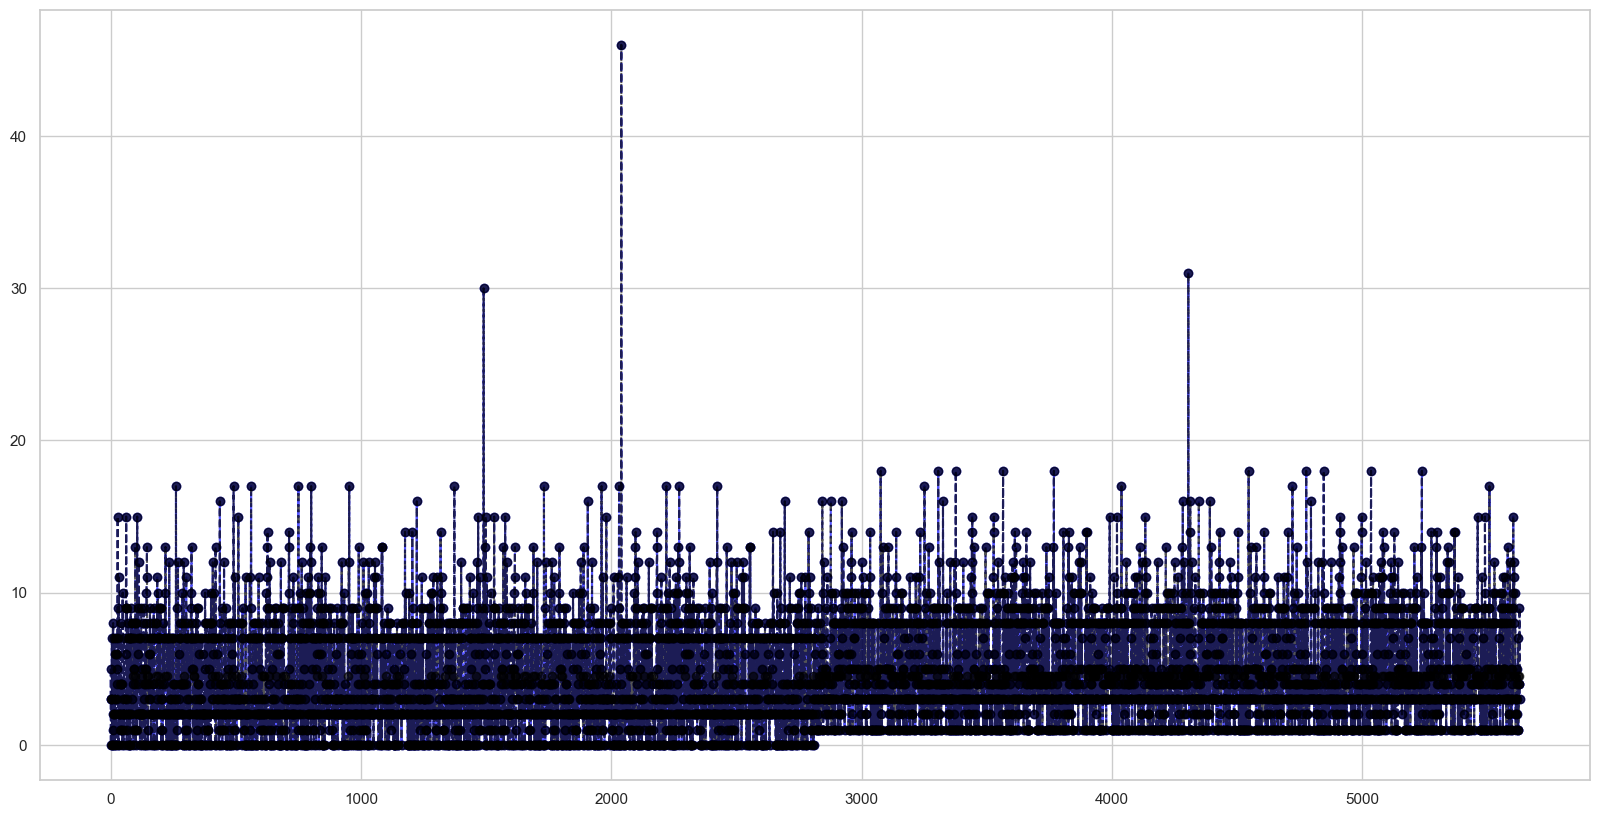

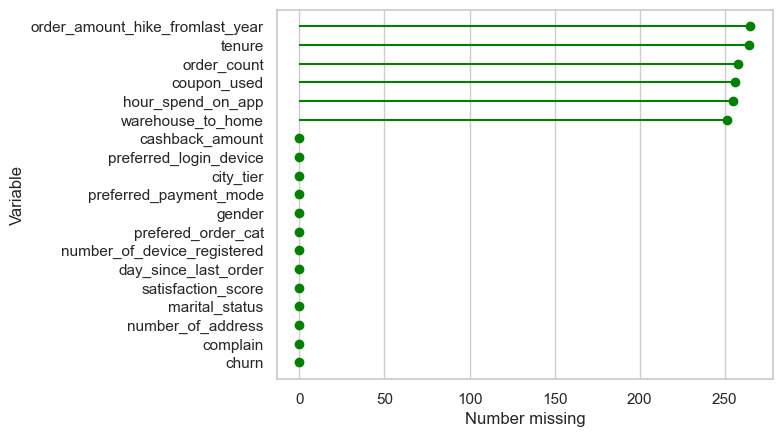

In [124]:
#Imputación de nulos por cada variable
missing_variable = 'day_since_last_order'
missing_variable

# Imputación por mediana a datos faltantes
data_df_clean_mean = data_df_raw.copy()
data_df_clean_mean[missing_variable] = data_df_clean_mean[missing_variable].fillna(
    data_df_clean_mean[missing_variable].mean()
)
data_df_clean_median = data_df_raw.copy()
data_df_clean_median[missing_variable] = data_df_clean_median[missing_variable].fillna(
    data_df_clean_median[missing_variable].median()
)
data_df_clean_moda = data_df_raw.copy()
data_df_clean_moda[missing_variable] = data_df_clean_moda[missing_variable].fillna(
    data_df_clean_moda[missing_variable].mode()
)

# Calcular el valor medio
media_original = data_df_raw[missing_variable].mean()
media_sin_nulos_mean = data_df_clean_mean[missing_variable].mean()
media_sin_nulos_median = data_df_clean_median[missing_variable].mean()
media_sin_nulos_moda = data_df_clean_moda[missing_variable].mean()

# Crear un DataFrame para mostrar los resultados en un cuadro
cuadro_resultados = pd.DataFrame({
    'Descripción': ['Media Original', 'Media sin Nulos_mean','Media sin Nulos_median', 'Media sin Nulos_moda'],
    'Valor': [media_original, media_sin_nulos_mean, media_sin_nulos_median, media_sin_nulos_moda]
})
display(cuadro_resultados)

import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para las gráficas
sns.set(style="whitegrid")

# Gráfico 1: Distribución original vs. imputada
plt.figure(figsize=(14, 6))

# Histograma de datos originales
plt.subplot(1, 4, 1)
sns.histplot(data_df_raw[missing_variable], bins=30, kde=True, color='skyblue')
plt.title('Distribución Original')
plt.axvline(media_original, color='blue', linestyle='--', 
            label=f'Media Original: {media_original:.2f}')
plt.xlabel(missing_variable)
plt.ylabel('Frecuencia')

# Histograma de datos con imputación por media
plt.subplot(1, 4, 2)
sns.histplot(data_df_clean_mean[missing_variable], bins=30, kde=True, color='salmon')
plt.title('Distribución con Imputación por Media')
plt.axvline(media_sin_nulos_mean, color='red', linestyle='--', 
            label=f'Media Original: {media_sin_nulos:.2f}')
plt.xlabel(missing_variable)
plt.ylabel('Frecuencia')

# Histograma de datos con imputación por median
plt.subplot(1, 4, 3)
sns.histplot(data_df_clean_median[missing_variable], bins=30, kde=True, color='salmon')
plt.title('Distribución con Imputación por Median')
plt.axvline(media_sin_nulos_median, color='red', linestyle='--', 
            label=f'Media Original: {media_sin_nulos_median:.2f}')
plt.xlabel(missing_variable)
plt.ylabel('Frecuencia')

# Histograma de datos con imputación por moda
plt.subplot(1, 4, 4)
sns.histplot(data_df_clean_moda[missing_variable], bins=30, kde=True, color='salmon')
plt.title('Distribución con Imputación por Mode')
plt.axvline(media_sin_nulos_moda, color='red', linestyle='--', 
            label=f'Media Original: {media_sin_nulos_moda:.2f}')
plt.xlabel(missing_variable)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))
data_df_raw[missing_variable].plot(color='blue',marker='o',alpha=6/9,linestyle='dashed')
data_df_clean_mean[missing_variable].plot(color='black',marker='o',alpha=6/9,linestyle='dashed')
plt.show()

#verificar la limpieza de valores nulos
data_df_clean = data_df_clean_mean
data_df_clean.missing.missing_variable_plot()

## Imputación de manera recursiva para el dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   churn                            5630 non-null   int64  
 1   tenure                           5366 non-null   float64
 2   preferred_login_device           5630 non-null   object 
 3   city_tier                        5630 non-null   int64  
 4   warehouse_to_home                5379 non-null   float64
 5   preferred_payment_mode           5630 non-null   object 
 6   gender                           5630 non-null   object 
 7   hour_spend_on_app                5375 non-null   float64
 8   number_of_device_registered      5630 non-null   int64  
 9   prefered_order_cat               5630 non-null   object 
 10  satisfaction_score               5630 non-null   int64  
 11  marital_status                   5630 non-null   object 
 12  number_of_address   

None

Imputando en columna 'tenure' con promedio 10.189899366380917
Imputando en columna 'warehouse_to_home' con promedio 15.639895891429633
Imputando en columna 'hour_spend_on_app' con promedio 2.9315348837209303
Imputando en columna 'order_amount_hike_fromlast_year' con promedio 15.707921714818266
Imputando en columna 'coupon_used' con promedio 1.7510234462225531
Imputando en columna 'order_count' con promedio 3.0080044676098288
Imputando en columna 'day_since_last_order' con promedio 4.543490512868683

DataFrame resultante:


,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,prefered_order_cat,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


0

None

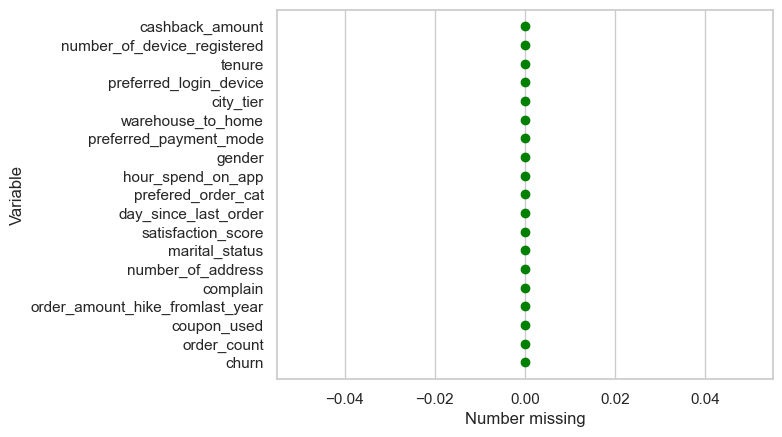

In [152]:
#Imputación de manera recursiva para el dataframe
df = data_df_raw.copy()
display(df.info())

# Aplicamos la función recursiva
df_imputado = imputar_recursivo(df.copy())

print("\nDataFrame resultante:")
display(df_imputado.head(5))
display(df_imputado.missing.number_missing())
display(df_imputado.missing.missing_variable_plot())

## Paso6: Codificación de variables categóricas

In [153]:
categorical_columns = df_imputado.select_dtypes(object).columns
categorical_columns

Index(['preferred_login_device', 'preferred_payment_mode', 'gender',
       'prefered_order_cat', 'marital_status'],
      dtype='object')

In [154]:
for cc in categorical_columns:
  print("*"*50)
  print(data_df_clean[cc].value_counts())

**************************************************
Mobile Phone    2765
Computer        1634
Phone           1231
Name: preferred_login_device, dtype: int64
**************************************************
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: preferred_payment_mode, dtype: int64
**************************************************
Male      3384
Female    2246
Name: gender, dtype: int64
**************************************************
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: prefered_order_cat, dtype: int64
**************************************************
Married     2986
Single      1796
Divorced     848
Name: marital_status, dtype: int64


In [155]:
ordinal_cols = ['gender']
onehot_cols = list(set(categorical_columns) - set(ordinal_cols))
onehot_cols

['marital_status',
 'preferred_payment_mode',
 'prefered_order_cat',
 'preferred_login_device']

## Creamos un transformer

In [156]:
import sklearn.compose
import sklearn.preprocessing

In [157]:
transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(),ordinal_cols),
    (sklearn.preprocessing.OneHotEncoder(),onehot_cols),
    remainder='passthrough'
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 ['gender']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['marital_status', 'preferred_payment_mode',
                                  'prefered_order_cat',
                                  'preferred_login_device'])])

## Aplicarmos el transformer a las variables categoricas

In [163]:
data_transformed_df = (
    pd.DataFrame(
        transformer.fit_transform(df_imputado),
        columns = transformer.get_feature_names_out(),
        index=data_df_clean.index
    )
)

data_transformed_df = data_transformed_df.rename(
    columns=lambda x: x.replace("ordinalencoder__", "").replace("onehotencoder__", "").replace("remainder__", "")
)

data_transformed_df

,gender,marital_status_Divorced,marital_status_Married,marital_status_Single,preferred_payment_mode_CC,preferred_payment_mode_COD,preferred_payment_mode_Cash on Delivery,preferred_payment_mode_Credit Card,preferred_payment_mode_Debit Card,preferred_payment_mode_E wallet,...,hour_spend_on_app,number_of_device_registered,satisfaction_score,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.000000,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.000000,160.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.000000,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.000000,121.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.000000,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.000000,120.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.000000,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.000000,134.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.931535,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.000000,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.000000,2.0,1.0,6.0,0.0,18.0,1.0,2.0,4.000000,151.0
5626,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.000000,5.0,5.0,6.0,0.0,16.0,1.0,2.0,4.543491,225.0
5627,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.000000,2.0,4.0,3.0,1.0,21.0,1.0,2.0,4.000000,186.0
5628,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4.000000,5.0,4.0,4.0,0.0,15.0,2.0,2.0,9.000000,179.0


In [164]:
data_transformed_df = (
    data_transformed_df.clean_names(
        case_type="snake"
    )
)
data_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5630 non-null   float64
 1   marital_status_divorced                  5630 non-null   float64
 2   marital_status_married                   5630 non-null   float64
 3   marital_status_single                    5630 non-null   float64
 4   preferred_payment_mode_cc                5630 non-null   float64
 5   preferred_payment_mode_cod               5630 non-null   float64
 6   preferred_payment_mode_cash_on_delivery  5630 non-null   float64
 7   preferred_payment_mode_credit_card       5630 non-null   float64
 8   preferred_payment_mode_debit_card        5630 non-null   float64
 9   preferred_payment_mode_e_wallet          5630 non-null   float64
 10  preferred_payment_mode_upi               5630 no

In [165]:
data_transformed_df = data_transformed_df.rename(
    columns=lambda x: x.replace("prefered_order_cat_", "order_").replace("preferred_payment_mode_", "payment_").replace("preferred_login_device_", "login_").replace("marital_status_", "")
)
data_transformed_df

,gender,divorced,married,single,payment_cc,payment_cod,payment_cash_on_delivery,payment_credit_card,payment_debit_card,payment_e_wallet,...,hour_spend_on_app,number_of_device_registered,satisfaction_score,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.000000,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.000000,160.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.000000,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.000000,121.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.000000,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.000000,120.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.000000,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.000000,134.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.931535,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.000000,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.000000,2.0,1.0,6.0,0.0,18.0,1.0,2.0,4.000000,151.0
5626,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.000000,5.0,5.0,6.0,0.0,16.0,1.0,2.0,4.543491,225.0
5627,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.000000,2.0,4.0,3.0,1.0,21.0,1.0,2.0,4.000000,186.0
5628,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4.000000,5.0,4.0,4.0,0.0,15.0,2.0,2.0,9.000000,179.0


In [167]:
data_transformed_df = data_transformed_df.rename(
    columns={
        "order_laptop_&_accessory":"order_laptop",
        "order_mobile":"order_phone",
        "payment_cash_on_delivery":"payment_cash",
        "payment_credit_card":"payment_credit",
        "payment_debit_card":"payment_debit",
        "payment_e_wallet":"payment_ewallet",
        "login_mobile_phone":"login_mobile",
        "warehouse_to_home":"distance",
        "hour_spend_on_app":"hour_spend",
        "number_of_device_registered":"device_registered",
        "number_of_address":"number_address",
        "order_amount_hike_fromlast_year":"order_lastyear",
        "day_since_last_order":"days_lastorder"
    }
)
data_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5630 non-null   float64
 1   divorced            5630 non-null   float64
 2   married             5630 non-null   float64
 3   single              5630 non-null   float64
 4   payment_cc          5630 non-null   float64
 5   payment_cod         5630 non-null   float64
 6   payment_cash        5630 non-null   float64
 7   payment_credit      5630 non-null   float64
 8   payment_debit       5630 non-null   float64
 9   payment_ewallet     5630 non-null   float64
 10  payment_upi         5630 non-null   float64
 11  order_fashion       5630 non-null   float64
 12  order_grocery       5630 non-null   float64
 13  order_laptop        5630 non-null   float64
 14  order_phone         5630 non-null   float64
 15  order_mobile_phone  5630 non-null   float64
 16  order_

In [168]:
data_transformed_df.head(5)

,gender,divorced,married,single,payment_cc,payment_cod,payment_cash,payment_credit,payment_debit,payment_ewallet,...,hour_spend,device_registered,satisfaction_score,number_address,complain,order_lastyear,coupon_used,order_count,days_lastorder,cashback_amount
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.000000,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.000000,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.000000,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.000000,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.931535,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,130.0


### Correlación de Variables

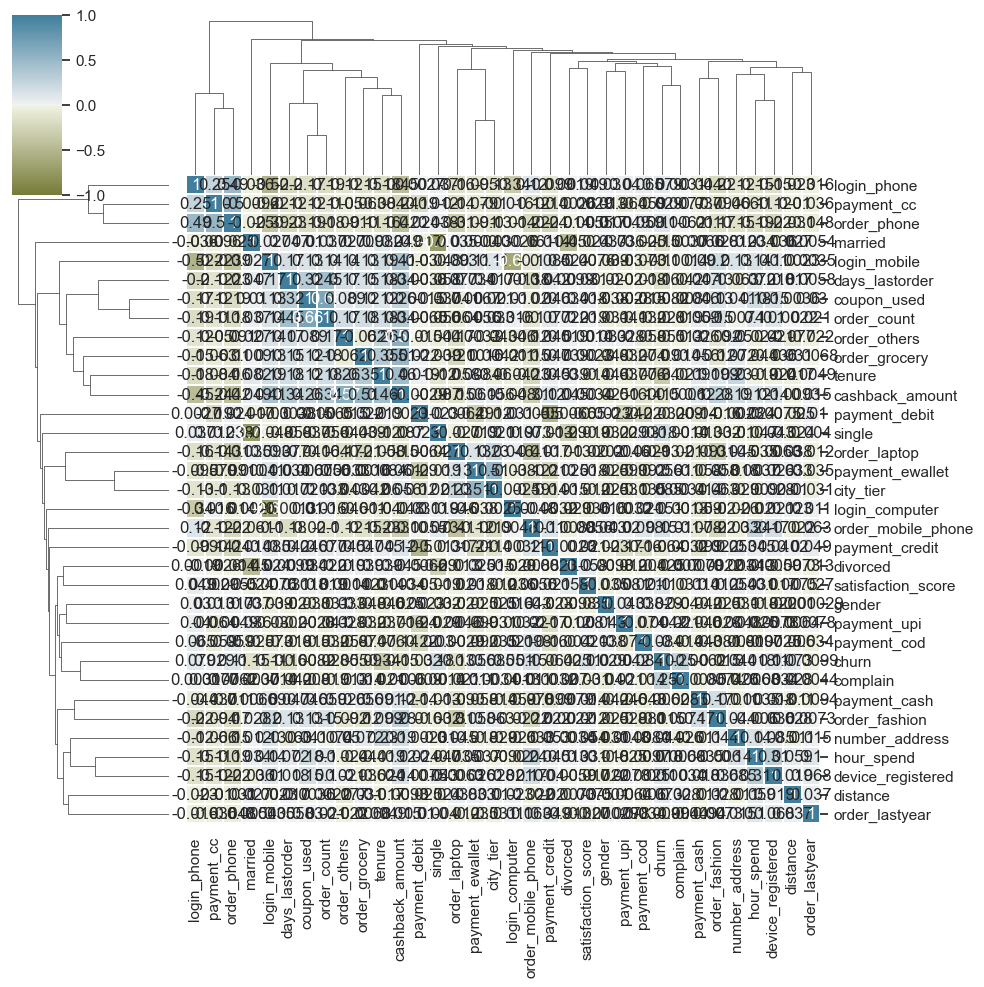

In [178]:
sns.clustermap(
    data=data_transformed_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(90,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.1,
    cbar_kws={'shrink':0.2},
    annot=True
)

## Regresión Lineal Multiple

In [176]:
import statsmodels.formula.api as smf

In [180]:
model_1 = (
    smf.ols(
        formula="cashback_amount ~ days_lastorder	",
        data=data_transformed_df
    )
    .fit()
)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        cashback_amount   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     729.2
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          3.97e-151
Time:                        18:42:18   Log-Likelihood:                -29578.
No. Observations:                5630   AIC:                         5.916e+04
Df Residuals:                    5628   BIC:                         5.917e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        155.9178      1.001    155.686      0.000     153.955     157.881
days_lastorder     4.6888      0.174     27.004      0.000       4.348       5.029
==============================================================================
Omnibus:                      913.107   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1530.035
Skew:                           1.075   Prob(JB):                         0.00
Kurtosis:                       4.378   Cond. No.                         9.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
model_2 = (
    smf.ols(
        formula="cashback_amount ~ days_lastorder + order_lastyear",
        data=data_transformed_df
    )
    .fit()
)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        cashback_amount   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     365.1
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          8.09e-150
Time:                        18:44:16   Log-Likelihood:                -29578.
No. Observations:                5630   AIC:                         5.916e+04
Df Residuals:                    5627   BIC:                         5.918e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        153.1956      2.877     53.256      0.000     147.556     158.835
days_lastorder     4.6878      0.174     26.998      0.000       4.347       5.028
order_lastyear     0.1736      0.172      1.009      0.313      -0.164       0.511
==============================================================================
Omnibus:                      914.771   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1535.515
Skew:                           1.076   Prob(JB):                         0.00
Kurtosis:                       4.385   Cond. No.                         78.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
model_3 = (
    smf.ols(
        formula="cashback_amount ~ days_lastorder + order_lastyear+distance ",
        data=data_transformed_df
    )
    .fit()
)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        cashback_amount   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     243.9
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          8.16e-149
Time:                        18:47:05   Log-Likelihood:                -29577.
No. Observations:                5630   AIC:                         5.916e+04
Df Residuals:                    5626   BIC:                         5.919e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        154.4857      3.060     50.478      0.000     148.486     160.485
days_lastorder     4.6914      0.174     27.016      0.000       4.351       5.032
order_lastyear     0.1814      0.172      1.054      0.292      -0.156       0.519
distance          -0.0914      0.074     -1.234      0.217      -0.237       0.054
==============================================================================
Omnibus:                      909.972   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1522.913
Skew:                           1.072   Prob(JB):                         0.00
Kurtosis:                       4.375   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
model_4 = (
    smf.ols(
        formula="cashback_amount ~ days_lastorder + order_lastyear+distance+gender",
        data=data_transformed_df
    )
    .fit()
)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        cashback_amount   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     183.5
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          4.72e-148
Time:                        18:47:20   Log-Likelihood:                -29576.
No. Observations:                5630   AIC:                         5.916e+04
Df Residuals:                    5625   BIC:                         5.920e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        155.6236      3.157     49.301      0.000     149.435     161.812
days_lastorder     4.6862      0.174     26.984      0.000       4.346       5.027
order_lastyear     0.1814      0.172      1.054      0.292      -0.156       0.519
distance          -0.0915      0.074     -1.236      0.217      -0.237       0.054
gender            -1.8512      1.260     -1.469      0.142      -4.321       0.619
==============================================================================
Omnibus:                      911.746   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1527.533
Skew:                           1.074   Prob(JB):                         0.00
Kurtosis:                       4.379   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Comparamos los modelos

In [189]:
model_1_predict = model_1.predict(data_transformed_df)
model_2_predict = model_2.predict(data_transformed_df)
model_3_predict = model_3.predict(data_transformed_df)
model_4_predict = model_4.predict(data_transformed_df)

In [190]:
dic_predict = {
    'actual_value':data_transformed_df.cashback_amount,
    'model_1_predict':model_1_predict,
    'model_2_predict':model_2_predict,
    'model_3_predict':model_3_predict,
    'model_4_predict':model_4_predict,  
}

models_result = pd.DataFrame(dic_predict)
models_result

,actual_value,model_1_predict,model_2_predict,model_3_predict,model_4_predict
0,160.0,179.361987,178.544235,179.390092,180.501319
1,121.0,155.917838,155.799568,156.476078,155.761558
2,120.0,169.984328,169.689406,168.357912,167.626342
3,134.0,169.984328,171.251791,171.361923,170.631142
4,130.0,169.984328,169.168611,169.458882,168.728779
...,...,...,...,...,...
5625,151.0,174.673158,175.071612,173.775055,173.038190
5626,225.0,177.221492,177.272196,177.515785,176.777479
5627,186.0,174.673158,175.592407,176.056057,175.320508
5628,179.0,198.117306,197.989877,198.607195,197.846303


### Graficamos los resultados

In [191]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

<Axes: ylabel='Proportion'>

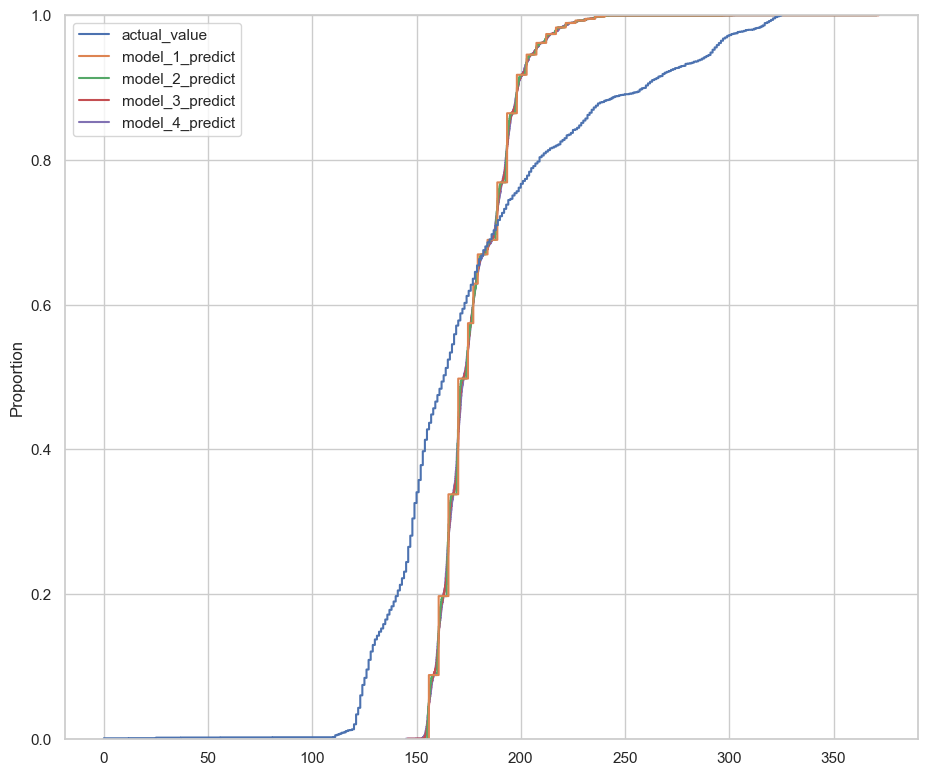

In [192]:
sns.ecdfplot(
    data=models_result
)

<Axes: ylabel='Proportion'>

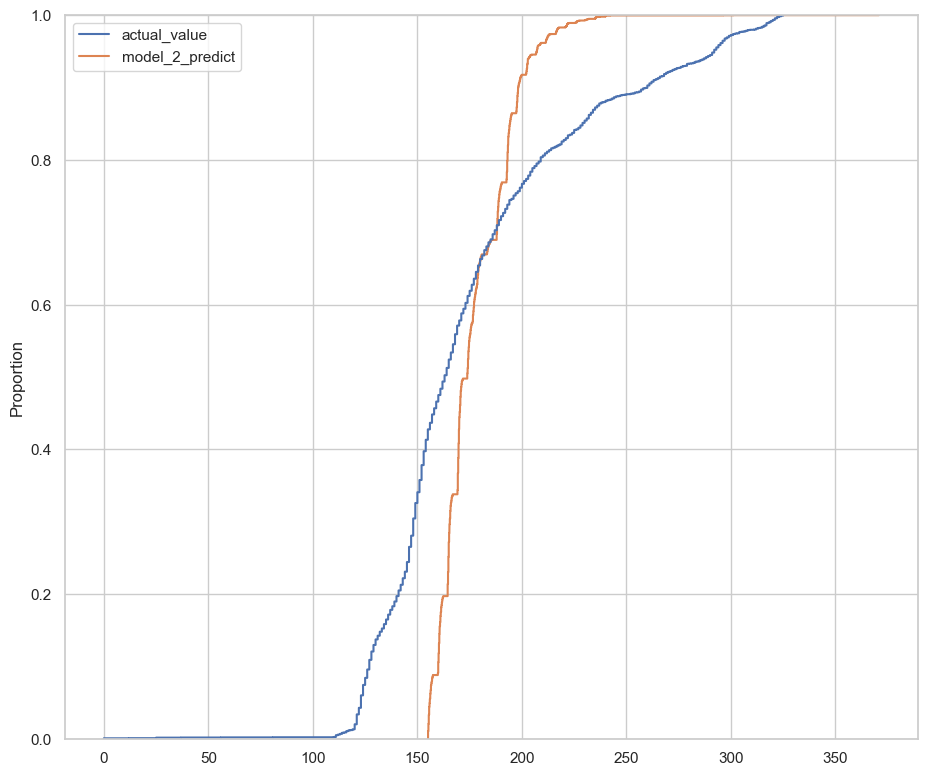

In [194]:
sns.ecdfplot(data=models_result[['actual_value','model_2_predict']])

<Axes: ylabel='Density'>

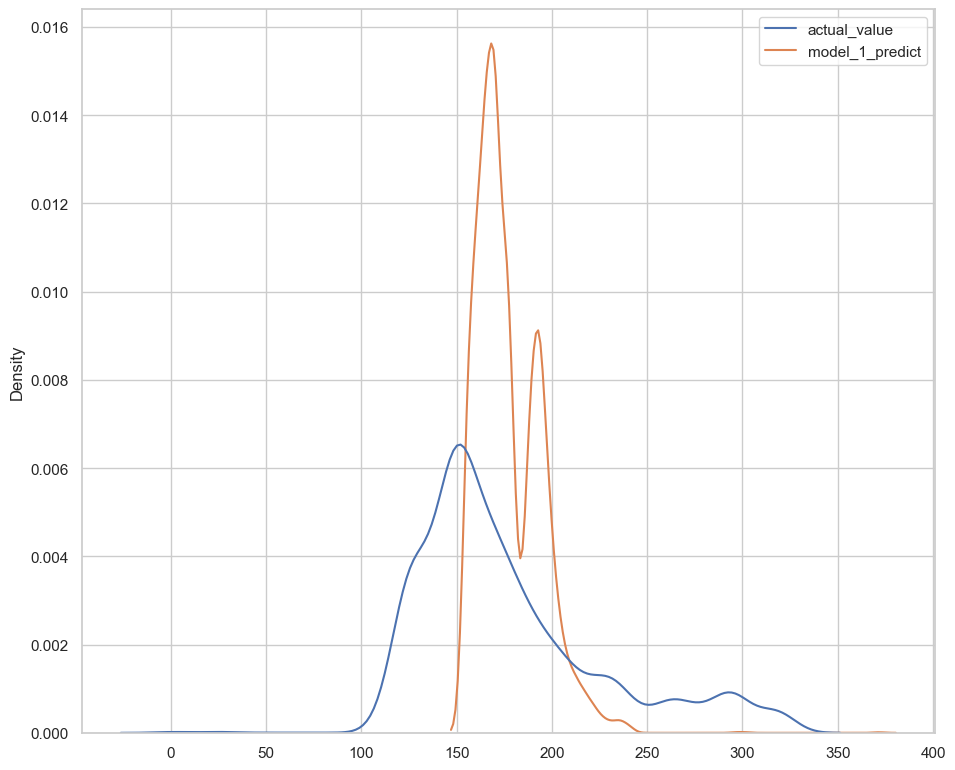

In [195]:
sns.kdeplot(data=models_result[['actual_value','model_1_predict']])

<Axes: ylabel='Density'>

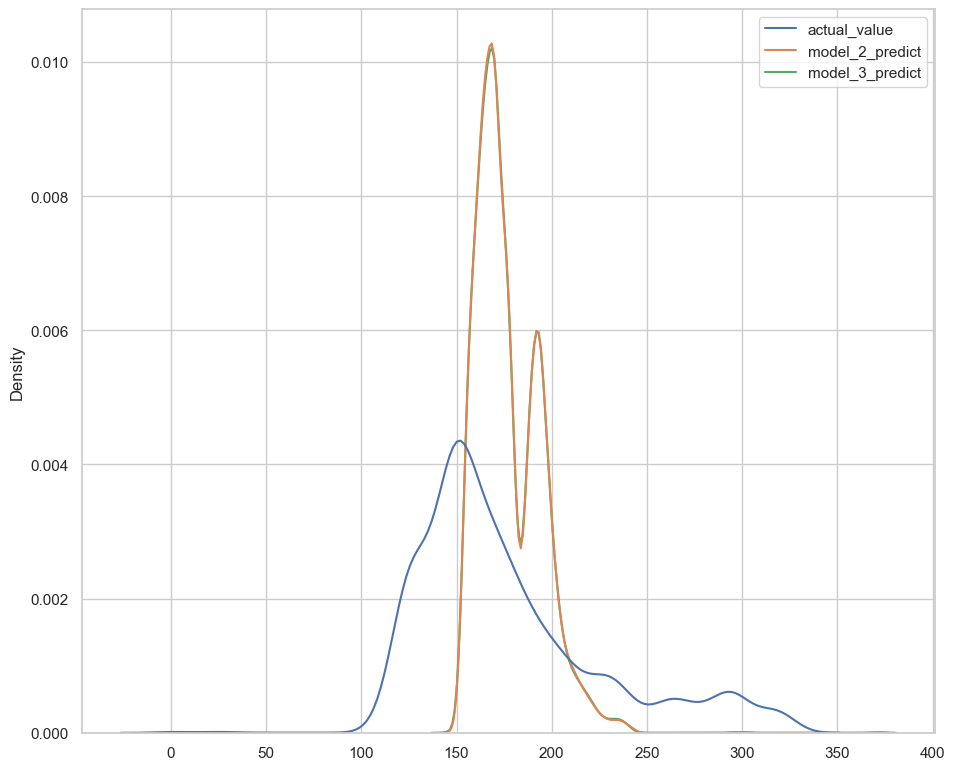

In [197]:
sns.kdeplot(data=models_result[['actual_value','model_2_predict','model_3_predict']])